In [499]:
import pandas as pd

In [500]:
dataset = pd.read_csv('/content/heart.csv')

In [501]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [502]:
dataset.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [503]:
import seaborn as sns 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


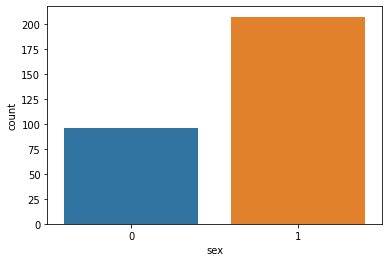

In [504]:
sns.countplot(dataset['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


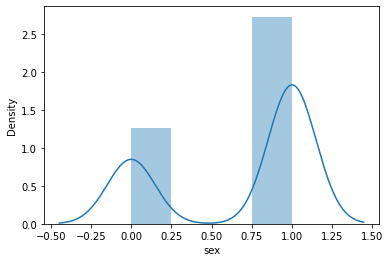

In [505]:
sns.distplot(dataset['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


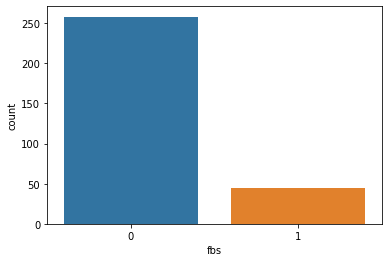

In [506]:
sns.countplot(dataset['fbs'])

In [507]:
x = dataset.drop('target',axis='columns')

In [508]:
y = dataset['target']

In [509]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [510]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [511]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [512]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(x,y,test_size=0.2,stratify=y)

In [513]:
train_data.shape

(242, 13)

In [514]:
from sklearn import preprocessing

In [515]:
train_data = preprocessing.normalize(train_data)
test_data = preprocessing.normalize(test_data)

In [516]:
train_data.shape

(242, 13)

In [517]:
train_data

array([[0.24719632, 0.        , 0.00823988, ..., 0.00823988, 0.        ,
        0.00823988],
       [0.19537162, 0.00320281, 0.00960844, ..., 0.00320281, 0.00640563,
        0.00640563],
       [0.20060819, 0.00345876, 0.        , ..., 0.00345876, 0.01037629,
        0.01037629],
       ...,
       [0.13783763, 0.        , 0.00424116, ..., 0.00424116, 0.00212058,
        0.00424116],
       [0.12949581, 0.00294309, 0.00294309, ..., 0.00588617, 0.        ,
        0.00882926],
       [0.17831931, 0.        , 0.        , ..., 0.        , 0.00575224,
        0.00575224]])

In [518]:
from tensorflow.keras import models
from tensorflow.keras.layers import *

In [519]:
model = models.Sequential()

In [520]:
train_data.shape

(242, 13)

In [521]:
model.add(Dense(1536, activation='tanh', input_shape=(13,)))
model.add(Dense(256, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [522]:
model.compile(optimizer='adam',
loss='mse',
metrics=['acc'])


In [523]:
model.fit(train_data,train_label, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2609 - acc: 0.4835
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2529 - acc: 0.5744
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2359 - acc: 0.5868
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2220 - acc: 0.6322
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2118 - acc: 0.6777
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2049 - acc: 0.6818
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2090 - acc: 0.6653
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1950 - acc: 0.6860
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1988 - acc: 0.6983
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1915 - acc: 0.6942
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1898 

In [524]:
model.save('Heart_Disease_UCI.h5')

In [525]:
model.evaluate(test_data,test_label)

2/2 [==============================] - 0s 6ms/step - loss: 0.1218 - acc: 0.8361


[0.12184926867485046, 0.8360655903816223]